                                            Máquinas de vectores de soporte


Las máquinas de vectores de soporte o máquina de vector de soporte (del inglés support-vector machines, SVM) son un conjunto de algoritmos de aprendizaje supervisado desarrollados por Vladímir Vapnik y su equipo en los laboratorios de AT&T Bell.

Estos métodos están propiamente relacionados con problemas de clasificación y regresión. Dado un conjunto de ejemplos de formación (de muestras) podemos etiquetar las clases y formar una SVM para construir un modelo que prediga la clase de una nueva muestra. Intuitivamente, una SVM es un modelo que representa a los puntos de muestra en el espacio, separando las clases a 2 espacios lo más amplios posibles mediante un hiperplano de separación definido como el vector entre los 2 puntos, de las 2 clases, más cercanos al que se llama vector soporte. Cuando las nuevas muestras se ponen en correspondencia con dicho modelo, en función de los espacios a los que pertenezcan, pueden ser clasificadas a una o la otra clase.

Dado un conjunto de puntos, subconjunto de un conjunto mayor (espacio), en el que cada uno de ellos pertenece a una de dos posibles categorías, un algoritmo basado en SVM construye un modelo capaz de predecir si un punto nuevo (cuya categoría desconocemos) pertenece a una categoría o a la otra. Como en la mayoría de los métodos de clasificación supervisada, los datos de entrada (los puntos) son vistos como un vector p-dimensional (una lista ordenada de p números). La SVM busca un hiperplano que separe de forma óptima a los puntos de una clase de la de otra, que eventualmente han podido ser previamente proyectados a un espacio de dimensionalidad superior.


######  Ejercicio Práctico


Para realizar uso del dataset asociado a esta práctica utilizaremos un dataset sobre información acerca del cáncer.

Cargue y devuelva el conjunto de datos de Wisconsin sobre cáncer de mama (clasificación).

El conjunto de datos sobre cáncer de mama es un conjunto de datos de clasificación binaria clásico y muy sencillo.


Conjunto de datos
Clases = 2

Muestras por clase = 212(M),357(B)

Total de muestras = 569

Dimensionalidad = 30

Características= real, positivo

In [22]:
# Primero debemos importar el set de datos.
from sklearn import datasets
import pandas

# Es mejor especificar como parámetro as_frame = True para que devuelva un dataframe.
datos = datasets.load_breast_cancer(as_frame=True)
# Debemos importar pandas para que pueda ser leído

datos = datos.frame      
datos.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [23]:
# Miremos una descripción del set de datos.
datos.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [24]:
# Miremos otra descripción del set de datos.
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Las descripciones del dataset nos demuestran que de momento no hay que realizar una limpieza en particular,
al parecer el tipo de datos es completamente numérico y flotante.
Este es un dato en extremo positivo porque al parecer podemos proceder directamente al manejo y relaciones del modelo, 
ya que nos evitamos el paso gigantesco de tener que realizar la limpieza y corrección del dataset.


In [25]:
# Como el dataset se encuentra en óptimas condiciones para nuestro modelo, 
# procederemos a realizar el entrenamiento y separación de forma inmediata.
from sklearn.model_selection import train_test_split
x = datos
y = datos.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .3)

In [26]:
# Es la hora de realizar implementación del modelo de SVMs o de (Máquina de vector de soporte)
from sklearn import svm
from sklearn import metrics
modelo = svm.SVC()
modelo.fit(x_train, y_train)
predicciones = modelo.predict(x_test)
print("Exactitud",metrics.accuracy_score(y_test,predicciones))
print("Precisión",metrics.precision_score(y_test,predicciones))

Exactitud 0.9239766081871345
Precisión 0.9098360655737705


In [27]:
# Probemos iterar un ciclo for para iterar los kernels y los gammas.
# Estos kernels y gammas son parámetros ajustables con los que podemos jugar hasta encontrar
# los parámetros más adecuados.

from sklearn import svm
from sklearn import metrics
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
gammas = [1,0.1,0.01,0.001]

for kernel in kernels:
    for gamma in gammas:
        modelo = svm.SVC(kernel=kernel, gamma=gamma)
        modelo.fit(x_train, y_train)
        predicciones = modelo.predict(x_test)
        print(f"kernel: {kernel} / Gamma:{gamma}: Exactitud",metrics.accuracy_score(y_test,predicciones))
        print(f"kernel: {kernel} / Gamma:{gamma}: Precisión",metrics.precision_score(y_test,predicciones))


kernel: linear / Gamma:1: Exactitud 1.0
kernel: linear / Gamma:1: Precisión 1.0
kernel: linear / Gamma:0.1: Exactitud 1.0
kernel: linear / Gamma:0.1: Precisión 1.0
kernel: linear / Gamma:0.01: Exactitud 1.0
kernel: linear / Gamma:0.01: Precisión 1.0
kernel: linear / Gamma:0.001: Exactitud 1.0
kernel: linear / Gamma:0.001: Precisión 1.0
kernel: poly / Gamma:1: Exactitud 1.0
kernel: poly / Gamma:1: Precisión 1.0
kernel: poly / Gamma:0.1: Exactitud 1.0
kernel: poly / Gamma:0.1: Precisión 1.0
kernel: poly / Gamma:0.01: Exactitud 1.0
kernel: poly / Gamma:0.01: Precisión 1.0
kernel: poly / Gamma:0.001: Exactitud 1.0
kernel: poly / Gamma:0.001: Precisión 1.0
kernel: rbf / Gamma:1: Exactitud 0.6608187134502924
kernel: rbf / Gamma:1: Precisión 0.6608187134502924
kernel: rbf / Gamma:0.1: Exactitud 0.6608187134502924
kernel: rbf / Gamma:0.1: Precisión 0.6608187134502924
kernel: rbf / Gamma:0.01: Exactitud 0.6608187134502924
kernel: rbf / Gamma:0.01: Precisión 0.6608187134502924
kernel: rbf / Gamm

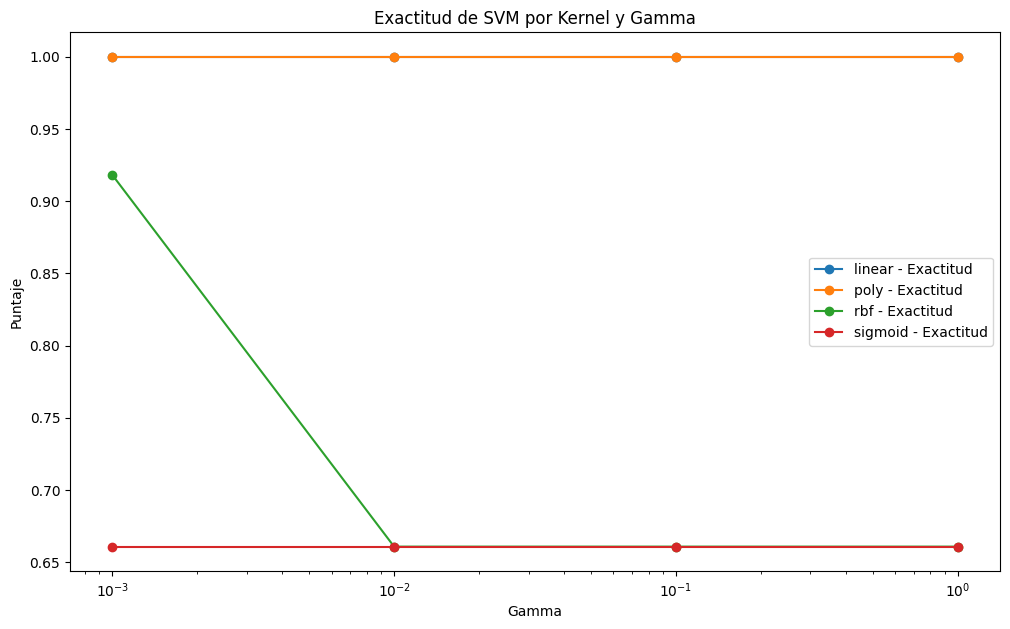

In [28]:
# Realicemos una gráfica del comportamiento de los modelos, en este punto es fácil lograr identificar,
# con cuál nos quedaremos viendo el gráfico.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, metrics

# Tus datos de entrenamiento y prueba
# x_train, y_train, x_test, y_test = ...

# Lista para almacenar los resultados
resultados = []

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
gammas = [1, 0.1, 0.01, 0.001]

for kernel in kernels:
    for gamma in gammas:
        modelo = svm.SVC(kernel=kernel, gamma=gamma)
        modelo.fit(x_train, y_train)
        predicciones = modelo.predict(x_test)

        # Calcula la exactitud y la precisión
        exactitud = metrics.accuracy_score(y_test, predicciones)
        precision = metrics.precision_score(y_test, predicciones)

        # Agrega los resultados a la lista
        resultados.append({
            'Kernel': kernel, 
            'Gamma': gamma, 
            'Exactitud': exactitud, 
            'Precision': precision
        })

# Crea un DataFrame a partir de la lista de resultados
df_resultados = pd.DataFrame(resultados)

# Gráfico de los resultados
plt.figure(figsize=(12, 7))
for kernel in kernels:
    df_subset = df_resultados[df_resultados['Kernel'] == kernel]
    plt.plot(df_subset['Gamma'], df_subset['Exactitud'], marker='o', label=f'{kernel} - Exactitud')

plt.xlabel('Gamma')
plt.ylabel('Puntaje')
plt.xscale('log')
plt.legend()
plt.title('Exactitud de SVM por Kernel y Gamma')
plt.show()

In [30]:
# Bueno, encontramos que el comportamiento de las iteraciones está mostrando modelos perfectos con,
# relación a los kernels = "linear" y "poly", ya que su respuesta es el 1 absoluto y un 0.98 a 1 ocasional consecutivo
# en cualquiera de sus gammas.
# Entonces escojamos para nuestro modelo kernel = linear y gamma = 1.

modelo = svm.SVC(kernel="linear", gamma=1)
modelo.fit(x_train, y_train)
predicciones = modelo.predict(x_test)
print(f"kernel: linear / Gamma:1 Exactitud",metrics.accuracy_score(y_test,predicciones))
print(f"kernel: linear / Gamma:1 Precisión",metrics.precision_score(y_test,predicciones))

kernel: linear / Gamma:1 Exactitud 1.0
kernel: linear / Gamma:1 Precisión 1.0


In [31]:
# Con nuestro modelo listo, realizaremos nuestro reporte de clasificación.
from sklearn.metrics import classification_report
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00       113

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171


In [34]:
# Podemos también realizar la verificación de nuestra matriz de confusión.
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,predicciones), columns=['Pre : NO', 'Pre : Si'], index=['Real : NO', 'Real : Si'])

,Pre : NO,Pre : Si
Real : NO,58,0
Real : Si,0,113


                                                 Conclusión
                                                 
 Es grata sorpresa para mi verificar que de momento el algoritmo quedo entrenado en un 100% de efectividad, o al menos en relación con respecto a los datos que estamos verificando.
El algoritmo de máquinas de vectores de soporte es muy bueno para realizar modelos que cumplen con muchas características y un set de datos no muy grande, utilizamos 569 muestras, pero claramente podemos hacerlo con muchos más.